<a href="https://colab.research.google.com/github/MuhtasimMahadi/Big_data_and_iot_lab/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd

In [52]:
import numpy as np

In [53]:
import matplotlib.pyplot as plt

In [50]:
df= pd.read_csv("/content/credit card.csv")

In [54]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,NaN,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,NaN,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43.0,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37.0,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41.0,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [49]:
dummies=pd.get_dummies(df['Car Model'])

KeyError: ignored

In [55]:
dummies

,Audi,BMW X5,Mercedez Benz,Toyota
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,0,0,1,0


In [56]:
merged=pd.concat([df,dummies],axis='columns')

In [57]:
merged

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Audi,BMW X5,Mercedez Benz,Toyota
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,1000.0,1000.0,1000.0,0.0,2000.0,1,0.0,1.0,0.0,0.0
2,3,90000.0,2,2,2,NaN,0,0,0,0,...,1500.0,1000.0,1000.0,1000.0,5000.0,0,0.0,1.0,0.0,0.0
3,4,50000.0,2,2,1,NaN,0,0,0,0,...,2018.0,1200.0,1100.0,1069.0,1000.0,0,0.0,1.0,0.0,0.0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,36681.0,10000.0,9000.0,689.0,679.0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.0,0,0,0,0,...,20000.0,5003.0,3047.0,5000.0,1000.0,0,NaN,NaN,NaN,NaN
29996,29997,150000.0,1,3,2,43.0,-1,-1,-1,-1,...,3526.0,8998.0,129.0,0.0,0.0,0,NaN,NaN,NaN,NaN
29997,29998,30000.0,1,2,2,37.0,4,3,2,-1,...,0.0,22000.0,4200.0,2000.0,3100.0,1,NaN,NaN,NaN,NaN
29998,29999,80000.0,1,3,1,41.0,1,-1,0,0,...,3409.0,1178.0,1926.0,52964.0,1804.0,1,NaN,NaN,NaN,NaN


In [33]:
#final=merged.drop(['Car Model'],axis='columns')

In [62]:
y= df['default.payment.next.month']

In [35]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
13    42000
14    32000
15    55000
Name: Sell Price, dtype: int64

In [68]:
X = df.drop(['default.payment.next.month'],axis=1)

In [59]:
final.shape

(16, 7)

In [60]:
final.columns

Index(['Mileage', 'Sell Price', 'Age', 'Audi', 'BMW X5', 'Mercedez Benz ',
       'Toyota'],
      dtype='object')

In [61]:
X

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000.0,2,2,1,24.0,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26.0,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,NaN,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,NaN,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2018.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57.0,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39.0,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,150000.0,1,3,2,43.0,-1,-1,-1,-1,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000.0,1,2,2,37.0,4,3,2,-1,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,80000.0,1,3,1,41.0,1,-1,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [65]:
fill= df['AGE'].median()
df.AGE = df.AGE.fillna(fill)

In [70]:
#Dataset splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)


In [71]:
#Train Model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

#predict
reg.predict(X_test)

array([0.15530952, 0.15492536, 0.12242047, ..., 0.13515879, 0.15527167,
       0.11578084])

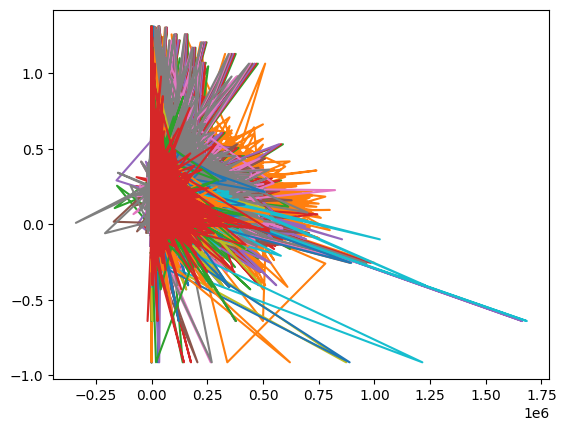

In [72]:
#best fit line
plt.plot(X,reg.predict(X))

In [73]:
reg.coef_

array([-2.38443737e-08, -7.49709857e-08, -1.13234174e-02, -1.36471188e-02,
       -2.39730093e-02,  1.46684992e-03,  9.51942931e-02,  2.34514816e-02,
        7.31416237e-03,  5.19590605e-03,  6.57935870e-03, -1.72255807e-03,
       -5.96802318e-07,  2.21641212e-07, -1.90089756e-07,  1.42973744e-07,
       -1.47494735e-07,  1.80859786e-07, -6.99812103e-07, -8.95669519e-08,
       -1.19944936e-07, -2.16602221e-07, -4.94583144e-07, -1.38280999e-07])

In [74]:
reg.intercept_

0.3005603492609742

In [75]:
reg.score(X_test,y_test)

0.12288123815997953

In [ ]:
reg.predict([[72000,4,0,0,0,1]])

In [79]:
import seaborn
from sklearn.svm import SVC
r=SVC(gamma='auto')
r.fit(X_train, y_train)
pred2= r.predict(X_test)

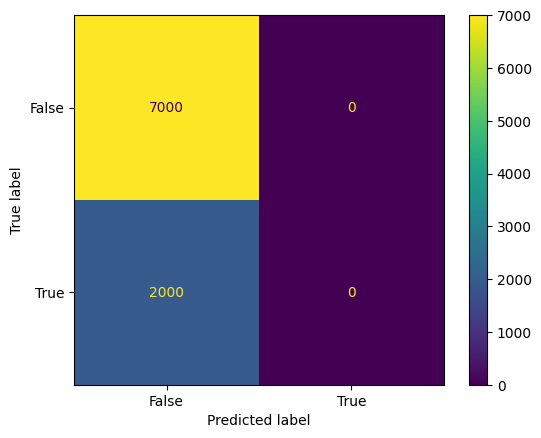

In [80]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,pred2)
cm_display =metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])
cm_display.plot()
plt.show()

In [81]:
from sklearn import tree
tree.plot_tree(d)

NameError: ignored

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d = DecisionTreeClassifier()
d.fit(X_train, y_train)